# Fundamentals of Data Analysis Project Notebook - Iris Dataset Analysis
Author - Sean Humphreys

---

### Contents

1. [Problem Statement](#problem-statement)
2. [Background](#background)
3. [Software Libraries](#software-libraries)
4. [Pandas](#pandas)
5. [Dataset Inspection](#dataset-inspection)
    1. [Data Quality](#data-quality)
    2. [Dataset Variables](#dataset-variables)
6. [Dataset Summary](#dataset-summary)
    1. [Nominal Variable](#nominal-variable---species)
    2. [Continuous Variables](#continuous-variables)
7. [Data Visualisation](#data-visualisation)
    1. [Categorical Variable](#categorical-variable)
    2. [Numerical Variables](#numerical-variables)
8. [Probability Distribution](#probability-distribution)
9. [Bivariate Analysis](#bivariate-analysis)
3. [Background Reading](#background-reading)

---

## Problem Statement <a id="problem-statement"></a>

- create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.
- in the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.
- Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.
- Select, demonstrate, and explain the most appropriate plot(s) for each variable
- The notebook should follow a cohesive narrative about the data set.
---

## Background <a id="background"></a>

The [Iris Data Set (https://en.wikipedia.org/wiki/Iris_flower_data_set)](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a data set that consists 50 samples from 
three species of Iris - Iris-setosa, Iris-virginica and Iris-versicolor. Each sample contains 4 measurements:
1. Petal width
2. Petal length
3. Sepal width
4. Sepal length

This data set is an example of a multivariate data set and was popularised by statistician and biologist [Sir Ronald
Fisher (https://en.wikipedia.org/wiki/Ronald_Fisher)](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper entitled 
[*"The use of multiple measurements in taxonomic problems"* (https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf)](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf)
. The data was collected by [Dr. Edgar Anderson (https://en.wikipedia.org/wiki/Edgar_Anderson)](https://en.wikipedia.org/wiki/Edgar_Anderson) from the Gaspé Peninsula in Canada. Two of the three species were collected from the same meadow, by the same person, using standard equipment 
in order to minimise the risk of variation in the data samples arising from the way in which it was collected and 
measured. Dr. Anderson is recognised as a significant contributor in the field of botanical genetics.

As can be seen from the picture below the appearance of each species is similar. Sir Fisher's Analysis of the data set
enabled accurate classification of the species from petal and sepal measurement and as a result the data set is 
routinely used as a beginners dataset for machine learning purposes.

![image 1](images/illustrations/Iris_Image.png "Iris Species")

---

## Software Libraries <a id="software-libraries"></a>

The following software libraries are used in this notebook:

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 8 Nov. 2023) - is an open-source software library for creating static, animated, and interactive visualizations in Python.

- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an open-source software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

- [Pathlib](https://docs.python.org/3/library/pathlib.html) (https://docs.python.org/3/library/pathlib.html - last accessed 23 Nov. 2023) -  a python module that offers classes representing filesystem paths with semantics appropriate for different operating systems.

- [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 21 Nov. 2023) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses NumPy underneath.

- [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 23 Nov. 2023) - is visualisation software that is built on matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import the required software libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from pathlib import Path

## Pandas <a id="pandas"></a>

Using *Python*, import the Iris dataset.

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)

[Pandas (https://pandas.pydata.org/)](https://pandas.pydata.org/) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure. Using Pandas it is possible to define variables to put the Iris dataset into Pandas DataFrames.

In [3]:
# data (as pandas dataframes) 
iris_ds_features = iris.data.features 
iris_ds_targets = iris.data.targets

To confirm the DataFrame data structure, the built-in *type* function in Python is used. 

In [4]:
print(type(iris_ds_features))
print(type(iris_ds_targets))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


A benefit of using Pandas is that it can be used to make datasets readable. In this instance Pandas is used to combine the two datasets into one DataFrame and rename the columns. Further cleaning of the dataset is carried out to remove the "*Iris-*" string from the species entries so that just the subgenus is left as a string in the species column.

In [5]:
# add the 'class' variable from iris_ds_targets variable into the iris_ds_features Pandas DataFrame
iris_ds_features['class'] = iris_ds_targets['class']

# rename the existing DataFrame (rather than creating a copy) 
iris_ds_features.rename(columns={'sepal length': 'sepal_length_cm', 'sepal width': 'sepal_width_cm', 'petal length': 'petal_length_cm', 'petal width': 'petal_width_cm', 'class': 'species'},  inplace=True)

# remove "Iris-" string from species entries - https://www.statology.org/pandas-remove-characters-from-string/ [Accessed 13 Oct. 2023]
iris_ds_features['species'] = iris_ds_features['species'].str.replace('Iris-', '')

---

## Dataset Inspection <a id="dataset-inspection"></a>

### Data Quality <a id="data-quality"></a>

Using the `isnull()` chained with the `sum()` method the dataset can be inspected for missing values. The output indicates no missing values in the dataset.

In [6]:
# https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/ [Accessed 13 Oct. 2023].
iris_ds_features.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

The DataFrame is inspected for any duplicate rows. There are three rows in the dataset that are duplicates og other rows. This could be due to the fact that more than one Iris flower had the same measurements or that the data is of questionable quality because the duplicate rows have been inserted from a transcribing error of some sort. In this case the assumption is made that more than one Iris flower had the same measurements.

In [7]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = iris_ds_features[iris_ds_features.duplicated()]

duplicate_rows

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


The first duplicate rows are viewed by passing the *keep = 'last'* argument.

In [8]:
duplicate_rows_last = iris_ds_features[iris_ds_features.duplicated(keep='last')]
duplicate_rows_last

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica


### Dataset Variables <a id="dataset-variables"></a>

Using the Pandas `head()` method the first 5 lines of the DataFrame can be viewed. From the output 5 variables are identified within the Iris Data

In [9]:
iris_ds_features.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Metadata on the Iris dataset is displayed with the following code (GitHub, 2023).

In [10]:
iris.variables

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


Information on the datatypes in the Iris dataset is summarised using the `info()` method (www.w3schools.com, n.d.).

In [11]:
iris_ds_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Variable classification determines the type of analysis that can be carried out on that variable. The graphic below summarises the types of data and how they can be analysed. 

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying data type classification and levels of measurement the Iris dataset variables can be summarised as follows:

**Variable Summary Table**

| Variable          | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------       | :----------       | :----------   | :----------   | :---------        | :---------        |
| sepal length      | Numerical         | Continuous    | float64       | cm                | Ratio             |
| sepal width       | Numerical         | Continuous    | float64       | cm                | Ratio             |
| petal length      | Numerical         | Continuous    | float64       | cm                | Ratio             |
| petal width       | Numerical         | Continuous    | float64       | cm                | Ratio             |
| species           | Categorical       | Nominal       | Object        | N/A               | Nominal           |

The above summaries of the Iris data set variables indicate the following:
1. Sepal length, sepal width, petal length and petal width are continuous data types with ratio level of measurement. As per Sharma (2020), the mathematical operations that can be performed on continuous data include addition, subtraction, multiplication and division on fractions and decimals. Thus, these 4 variables are suitable for complex statistical analysis.
2. Sepal length, sepal width, petal length and petal width and 64-bit are stored in memory as 64bit floating point numbers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.
3. The species variable is a categorical data type with a nominal level of measurement. The only analysis that can be carried out on it is counts of objects.
4. The species variable is stored in the Pandas DataFrame as an object. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018).

---

## Dataset Summary <a id="dataset-summary"></a>

### Nominal Variable <a id="nominal-variable"></a>

As *species* is a nominal variable, analysis of this variable is limited to counts of objects. The only measure of central tendency for this variable type is the mode (Corporate Finance Institute, n.d.). The mode is the value that appears most often in a set. Using the `value_counts()` method it is possible to count the number of unique occurrences on an object.

In [12]:
iris_ds_features['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

The *species* variable can be described as tri-modal as each of the species occurs 50 times.

In [13]:
iris_ds_features['species'].mode()

0        setosa
1    versicolor
2     virginica
Name: species, dtype: object

### Continuous Variables <a id="continuous-variables"></a>

Sepal length, sepal width, petal length and petal width are continuous variables. Complex mathematical operations can be carried out on these variables. The *Pandas* `describe()` returns a summary of the variables (MungingData, 2021):

In [14]:
iris_ds_features.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The **mean** value is expressed mathematically where the mean is the sum of the values divided by the number of values:

$\bar X= \frac{\Sigma X}{n}$

**std** is the standard deviation. Standard deviation is a measure of how dispersed the data is in relation to the mean (National Library of Medicine, 2012). It can be thought of as how spread around the mean the data is. A small standard deviation and the data is tightly clustered around the mean, while a large standard deviation data points are further from the mean. The standard deviation expressed mathematically is:

$s = \sqrt{\frac {\sum_{i=1}^N (x_i - \overline{x})^2}{N-1}}$

The *median* or middle is reported at the 50% value in the above python output. The 25% and 75% values are the first and third quartile values. The first and third quartiles can be used to identify outlier values in the dataset, this will be explored further in [Data Visualisation]().

The mode of the continuous variables can be reported:

In [15]:
iris_ds_features[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].mode()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.0,3.0,1.5,0.2


Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python. In the Iris dataset *sepal length*, *sepal width*, *petal length* and *petal width* are stored in the Pandas DataFrame as 64bit floating point numbers. This allows for a high degree of precision and will somewhat mitigate the issue outlined above, albeit at the cost of a computational overhead due to the larger size of this datatype.

The importance of precision is demonstrated by comparing the table below to the output of the `describe()` method above.
![Iris dataset summary](images/tables/data_summary.png 'High Precision Summary')

The mean petal width measurement is being shown to precision of 6 decimal places in the python output. However, it appears that the last number is being rounded up to 7 when compared to the table above. Therefore, 1.198667 is an approximation of the mean petal width. Performing the same arithmetic on both numbers will give different results as they are different numbers. This may seem insignificant, however, could lead to inaccurate model development.

## Data Visualisation <a id="data-visualisation"></a>

### Categorical Variable <a id="categorical-variable"></a>

The value counts of the *species* variable can be visualised as a bar chart.

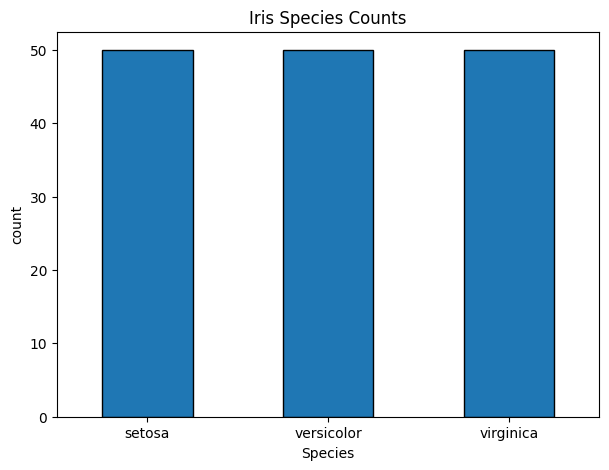

In [16]:
# set plot size
plt.rcParams['figure.figsize'] = (7,5)

# display results
iris_ds_features['species'].value_counts().plot(kind = 'bar', linewidth = 1, edgecolor = 'k')
plt.title('Iris Species Counts')
plt.xlabel('Species')
plt.ylabel('count')
plt.xticks(rotation = 360)
plt.show()

### Numerical Variables <a id="numerical-variables"></a>

Visualisation of the *species* variable reveals little, however visualising the dataset by species allows deeper insight into the dataset.

Outliers, the median, mean and upper and lower quartiles can be viewed using boxplots. Outliers are described as objects that 
deviate significantly from the rest for the objects. Outliers can be caused by a number of things including measurement error, sampling problems and natural variation (Singh, 2020). The outliers are visible on **[Plot 1](images/plots/box_plots/box_plots.png)** as an "x". The mean value is demonstrated by the clear circle marker.

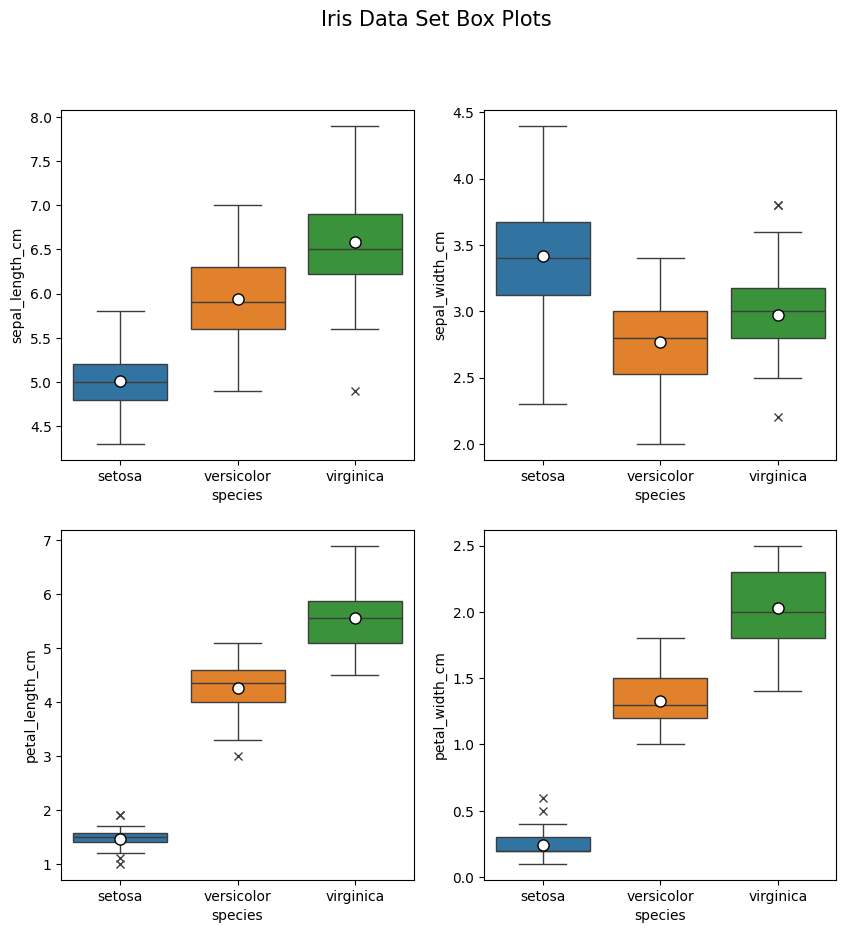

In [17]:
# function to pass arguments to sns.boxplot method
def graph(y):
    sns.boxplot(x="species", y=y, data=iris_ds_features, hue='species', showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white',
                'markeredgecolor':'black', 'markersize':'8'}, flierprops ={'marker':'x'})

# plot size
plt.figure(figsize=(10, 10))
plt.suptitle('Iris Data Set Box Plots', size=15)

# Adding the subplot at the specified grid position
plt.subplot(221)
graph('sepal_length_cm')

plt.subplot(222)
graph('sepal_width_cm')

plt.subplot(223)
graph('petal_length_cm')

plt.subplot(224)
graph('petal_width_cm')

Boxplots reveal:
- There is no overlap between the range of Setosa petal length and petal width values and the other species petal length and petal width.
- There is a small number of outlier in Setosa petal length, Setosa petal width, Veriscolor petal length, Virginica sepal length and Virginica sepal width.
- The mean and median Sepal width values for all species are close in value.

Visualising histograms of each individual numerical variable gives an insight into the distribution of that variable.

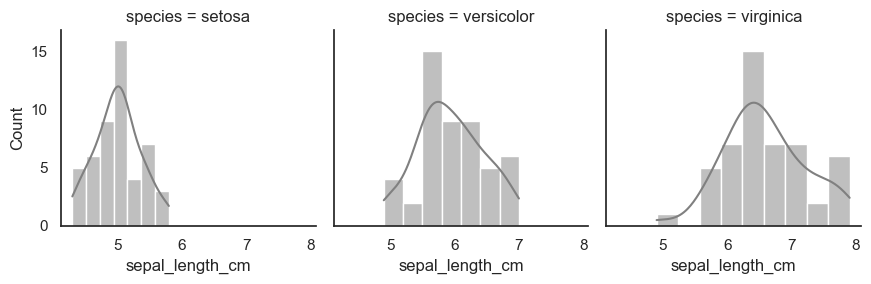

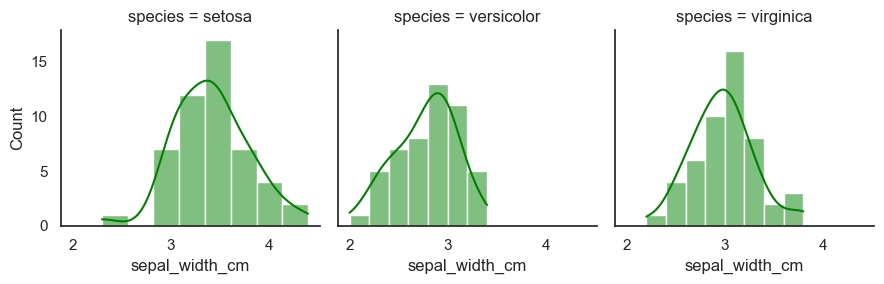

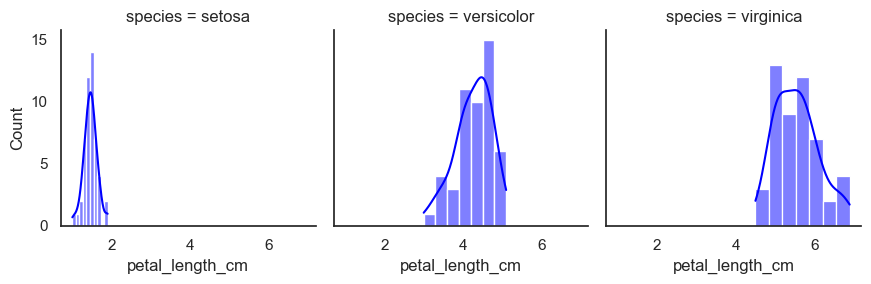

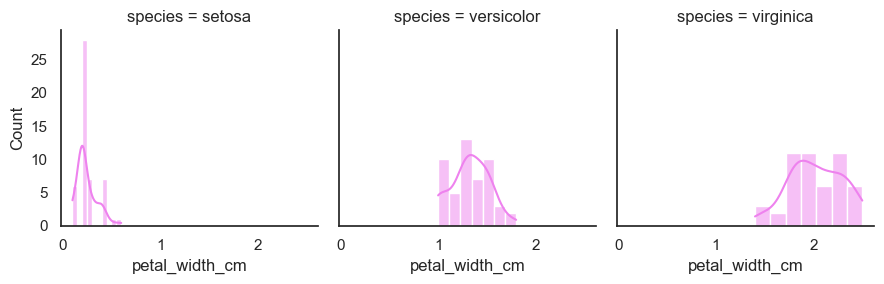

In [18]:
# https://seaborn.pydata.org/generated/seaborn.set_theme.html - accessed 08/11/2023
sns.set_theme(context='notebook', style='white', palette='pastel', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html - accessed 08/11/2023
g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.histplot, "sepal_length_cm", color='grey', kde = True)

g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.histplot, "sepal_width_cm", color='green', kde = True)

g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.histplot, "petal_length_cm", color='blue', kde = True)

g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.histplot, "petal_width_cm", color='violet', kde = True)


With the exception of Virginica petal width the above histograms demonstrate that data near the mean occurs more frequently than data further away from the mean. Virginica petal widths appear to be more uniformly distributed.

## Probability Distribution <a id="probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

Kernel Density Estimation (KDE) represents the data using a continuous probability density curve in one or more dimensions and uses the application of kernel smoothing for probability density estimation (Pydata.org, 2012). This is demonstrated on the histograms above as the curve overlaid onto the distribution histogram.

Using Seaborn the KDE for the numerical variables can be illustrated.

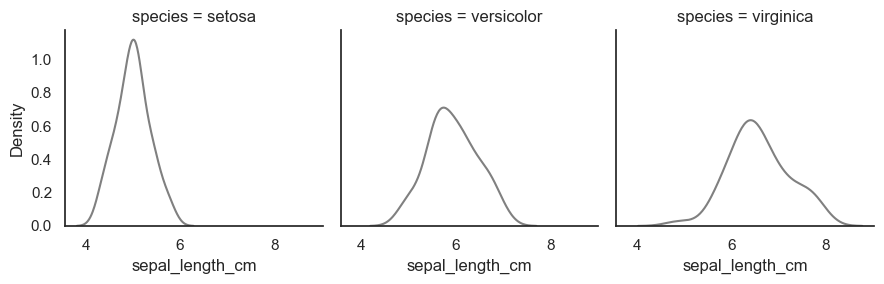

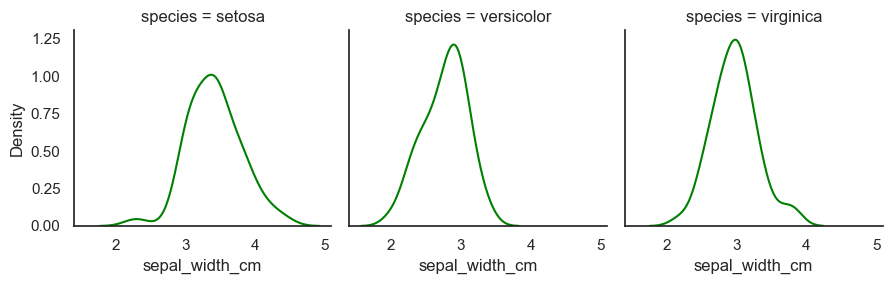

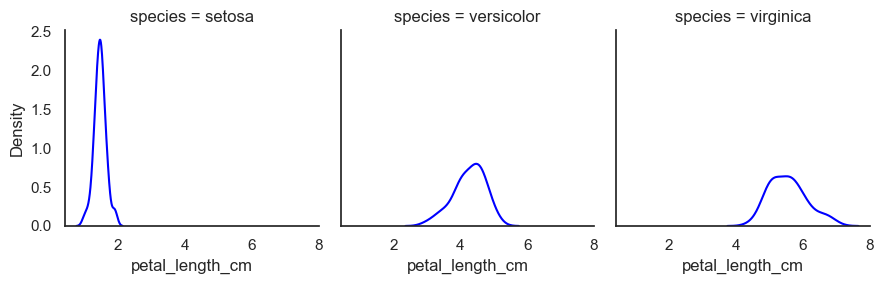

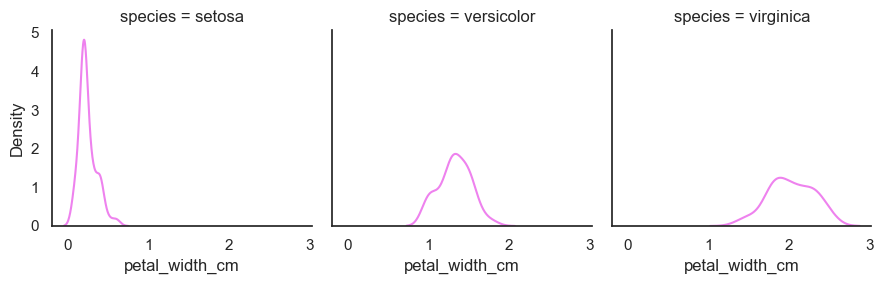

In [19]:
g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.kdeplot, "sepal_length_cm", color='grey')

g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.kdeplot, "sepal_width_cm", color='green')

g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.kdeplot, "petal_length_cm", color='blue')

g = sns.FacetGrid(iris_ds_features, col="species")
g.map(sns.kdeplot, "petal_width_cm", color='violet')

All of the resulting KDE curves have a bell shape distribution. This shape equate to series of values clustered around the mean value with values occuring less frequently the further away from the mean. In terms of probability distribution the visual shape of the KDE curves resemble the normal or Gaussian probability distribution.

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean.

**Standard Probability Distribution** - By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

To demonstrate the hypothesis that the normal probability distribution is a good fit, based on visual inspection of the dataset, the subset of Setosa Sepal length can be analysed in more detail. Not withstanding, this is a small subset and just one feature that is being tested, the process can be applied to the other features. For the sake of brevity this is beyond the scope of what can be demonstrated in this notebook. In essence the following procedure is a test or proof of concept that can be applied to the other variables in the dataset.

A function to return the normal distribution is defined. 

In [20]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

Explore the Setosa sepal length subset to get sight on the normal distribution parameters.

In [21]:
# define the y axis - setosa sepal length subset of dataset
data = iris_ds_features['sepal_length_cm'][0:50]

data.describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length_cm, dtype: float64

In [22]:
# define the x axis
x_axis = np.linspace(4.3,5.8,50)

# define the normal distribution PDF of setosa sepal length
pdf = normal_dist(x_axis ,5.006 , 0.35249)

The resulting plot demonstrates the maunally calculated PDF and the automatically KDE are almost identical thus validating that the normal distribution is a suitable probability distribution to use to model the Setosa Sepal Length.

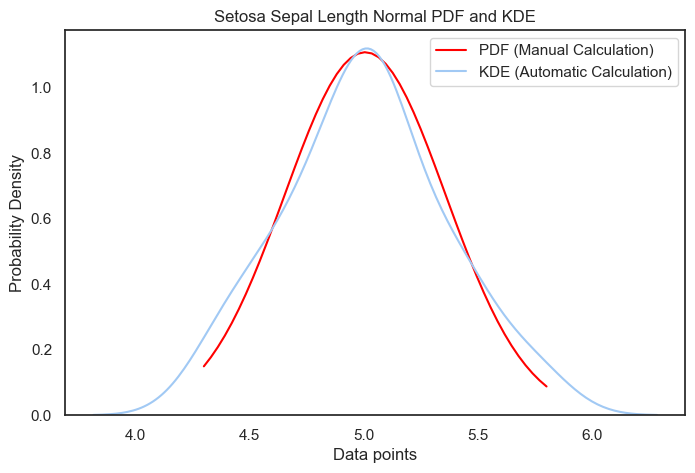

In [42]:
# Create an empty plot.
fig, axe = plt.subplots(figsize=(8,5))

# display the results
plt.plot(x_axis, pdf, color = 'red', label="PDF (Manual Calculation)")
sns.kdeplot(data, label="KDE (Automatic Calculation)")
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title('Setosa Sepal Length Normal PDF and KDE')
axe.legend()
plt.show()


This can be further tested by using SciPy to return a numerical value for distribution fit. A function is defined that will test the normal distribution fit applying the Kolmogorov-Smirnov test. The closer the returned value is to one the better the fit. Interesitngly the returned value for the normal distribution is $\approx$ 0.05. This would suggest that the normal distribution is not an exact fit and would warrant testing against other probability distributions to find the best fit.

In [36]:
# adapted from code accessed here:
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023]
def get_best_distribution(data):
    dist_names = ["norm"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [37]:
get_best_distribution(data)

Best fitting distribution: norm
Best p value: 0.5005012309573489
Parameters for the best fit: (5.006, 0.3489469873777391)


---

## Bivariate Analysis <a id="bivariate-analysis"></a>

Thus far the data has been explore individually, also know as univariate data analysis. The next section explores the dataset variables how the dataset variables are related. A simple way to visualise the bivariate relationship between the dataset variables is to use a pairplot.

Text(0.5, 0.98, 'Iris Data Set Pairplot')

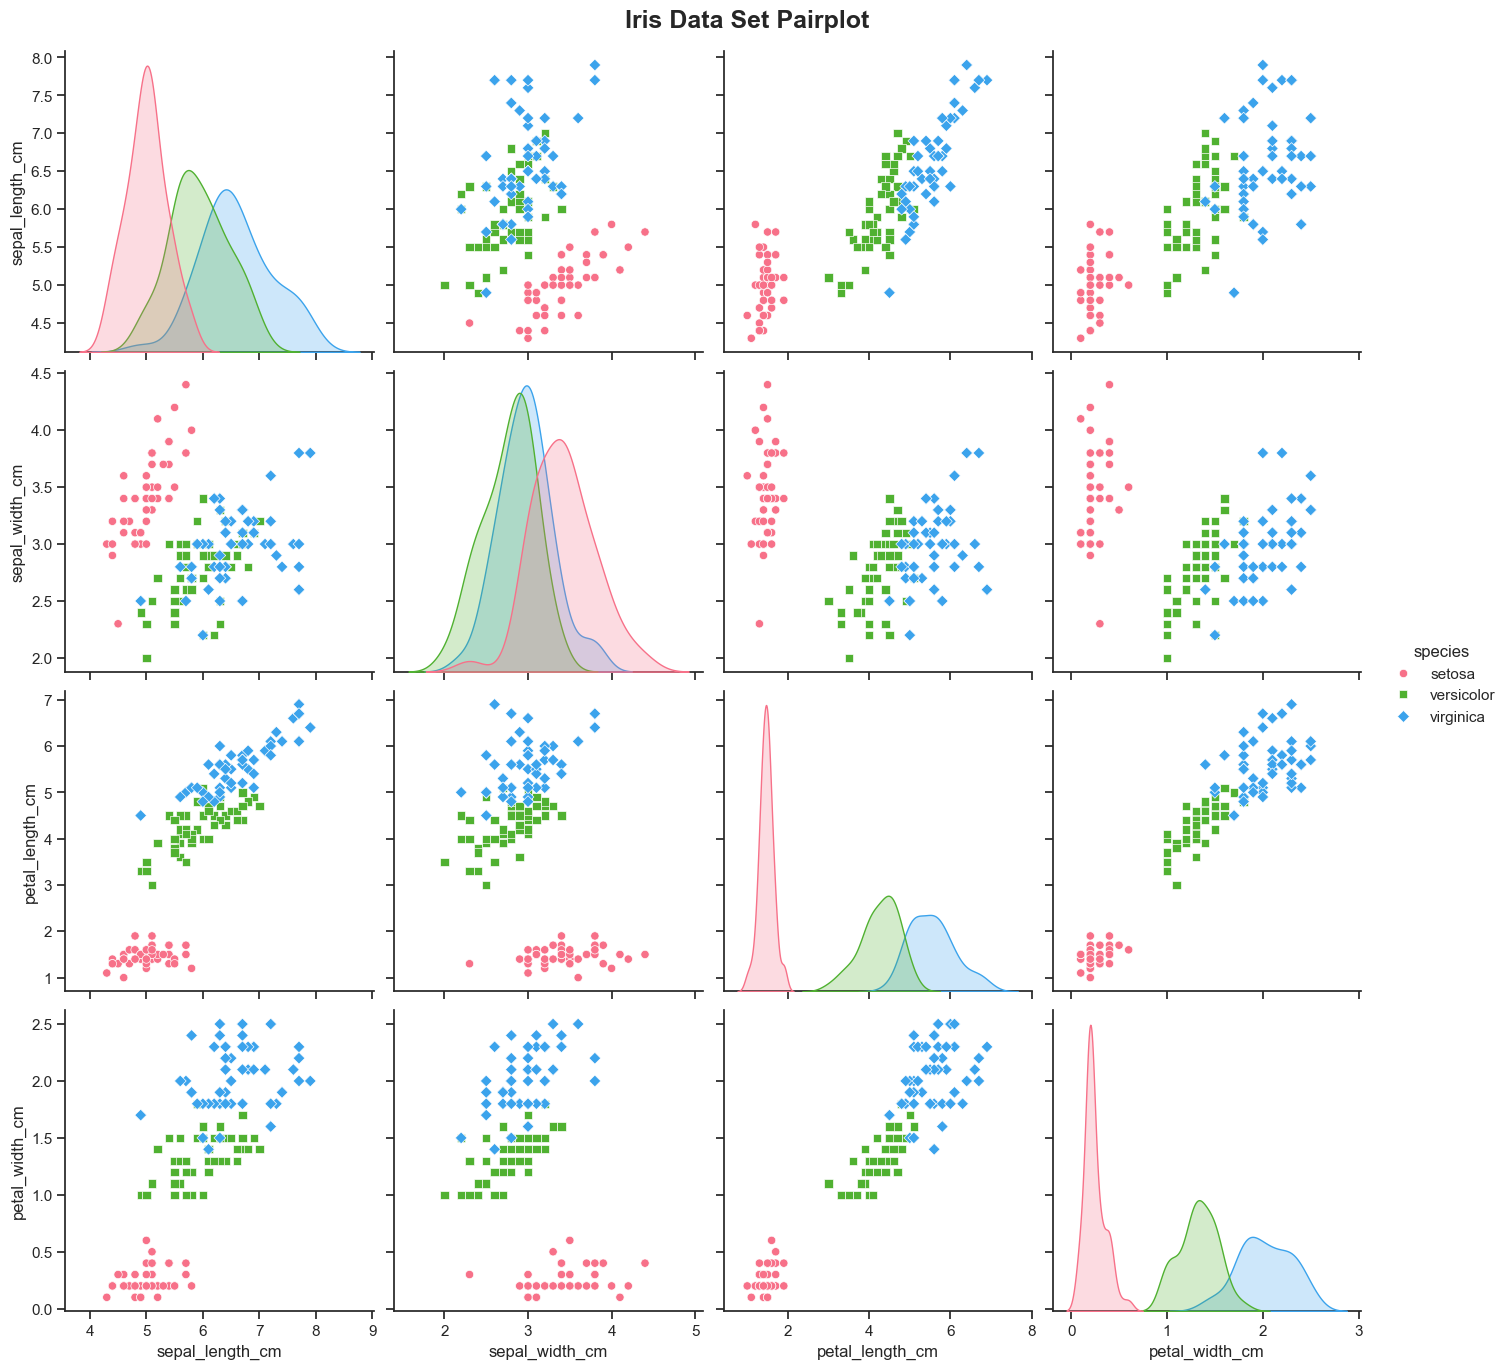

In [63]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set(style="ticks", color_codes=True)
pp = sns.pairplot(iris_ds_features, hue="species", height=3.5, diag_kind="kde", palette="husl", markers=["o", "s", "D"])
pp.fig.subplots_adjust(top=.95)
pp.fig.suptitle("Iris Data Set Pairplot", fontsize=18, weight='bold')

---

---

## References <a id="references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 18 Oct. 2023].

Corporate Finance Institute. (n.d.). Nominal Data. [online] Available at: https://corporatefinanceinstitute.com/resources/data-science/nominal-data/. [Accessed 4 Nov. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 10 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 18 Oct. 2023].

GitHub. (2023). ucimlrepo package. [online] Available at: https://github.com/uci-ml-repo/ucimlrepo [Accessed 20 Oct. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

National Library of Medicine (2012). Finding and using health statistics. [online] www.nlm.nih.gov. Available at: https://www.nlm.nih.gov/oet/ed/stats/02-900.html. [Accessed 4 Nov. 2023].

Pydata.org. (2012). seaborn.kdeplot — seaborn 0.9.0 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.kdeplot.html. [Accessed 8 Nov. 2023].

seaborn.pydata.org. (n.d.). seaborn.FacetGrid — seaborn 0.12.0 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html. [Accessed 8 Nov. 2023].

seaborn.pydata.org. (n.d.). seaborn.set_theme — seaborn 0.12.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.set_theme.html. [Accessed 8 Nov. 2023].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 18 Oct. 2023].

Singh, R. (2020). It’s all about Outliers. [online] Medium. Available at: https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309. [Accessed 6 Nov. 2023].

Stack Overflow. (n.d.). How to find probability distribution and parameters for real data? (Python 3). [online] Available at: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 25 Oct. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 20 Oct. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

---

## Associated Reading <a id="background-reading"></a>

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/53/iris. [Accessed 12 Oct. 2023].

Cross Validated. (n.d.). Can a probability distribution value exceeding 1 be OK? [online] Available at: https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok [Accessed 8 Nov. 2023].

Ekiz, A. (2023). Creating Table of Contents in Jupyter Notebook. [online] Medium. Available at: https://medium.com/@ahmetekiz/creating-table-of-contents-in-jupyter-notebook-52a7c696817f [Accessed 11 Oct. 2023].

GeeksforGeeks. (2020). Python - Basics of Pandas using Iris Dataset. [online] Available at: https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/. [Accessed 13 Oct. 2023].

https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf  [accessed 11 Oct. 2023].

kaggle.com. (n.d.). How to Classify Penguins - A Beginner’s Guide. [online] Available at: https://www.kaggle.com/code/mohamedharris/how-to-classify-penguins-a-beginner-s-guide [Accessed 6 Nov. 2023].

matplotlib.org. (n.d.). Matplotlib documentation — Matplotlib 3.5.0 documentation. [online] Available at: https://matplotlib.org/stable/. [Accessed 6 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 13 Oct. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.value_counts — pandas 1.4.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html. [Accessed 04 Nov. 2023].

seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/. [Accessed 6 Nov. 2023].

seaborn.pydata.org. (n.d.). seaborn.histplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.histplot.html. [Accessed 8 Nov. 2023].

Scribbr. (n.d.). Can there be more than one mode? [online] Available at: https://www.scribbr.com/frequently-asked-questions/can-there-be-more-than-one-mode/. [Accessed 04 Nov. 2023]

sphweb.bumc.bu.edu. (n.d.). Descriptive Statistics for Continuous Variables. [online] Available at: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/BS704_SummarizingData5.html.

Stack Overflow. (n.d.). python - Renaming column names in Pandas. [online] Available at: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas. [Accessed 13 Oct. 2023]. [Accessed 04 Nov. 2023].

Wikipedia. (2023). Edgar Anderson. [online] Available at: https://en.wikipedia.org/wiki/Edgar_Anderson [Accessed 11 Oct. 2023].

Wikipedia Contributors (2019). Iris flower data set. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Iris_flower_data_set. [Accessed 11 Oct. 2023].
‌
Wikipedia Contributors (2019). Ronald Fisher. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Ronald_Fisher. [Accessed 11 Oct. 2023].

www.overleaf.com. (n.d.). List of Greek letters and math symbols. [online] Available at: https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols. [Accessed 4 Nov. 2023].

Zach (2022). Pandas: How to Remove Specific Characters from Strings. [online] Statology. Available at: https://www.statology.org/pandas-remove-characters-from-string/. [Acessed 13 Oct. 2023].

---

End of notebook